<div class="alert alert-block alert-info">


<h1 align="left">Oracle Lens</h1> 

<img align="right" src="oracleLens.jpg" width="120" height="240"/>

<h3 align="center">Predicting the outcome of a game of League of Legends from pregame data</h3> 
<h3 align="center">Orion Gesslein, Cobi O'Connell</h3> 
<br> <br> <br> <br> <br>

</div>





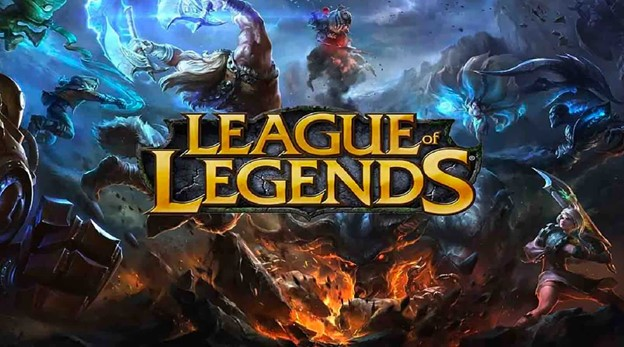

<br> <br>

<h2 align="center">Problem Introduction</h2> <br>

- League of Legends is a multiplayer online battle arena (MOBA) video game where the main objective is to destroy the opposing team’s structures.


- Each team consists of five “champions”,  which are characters with unique abilities.


- There are 153 total champions in the game.


- Our goal is to create a model that can predict the winner of a match given the champion selections of each team.


- With matchmaking randomly assigning different skilled players to teams, it may be tough to predict at times.


<br> <br>

<div class="alert alert-block alert-success">
<h2 align="center">Proposed Solution</h2> <br> <br>

- Neural Network that consists of one hidden layer

<br>

<h4 align="center"><i>Example of neural network with one hidden layer<i></h4>

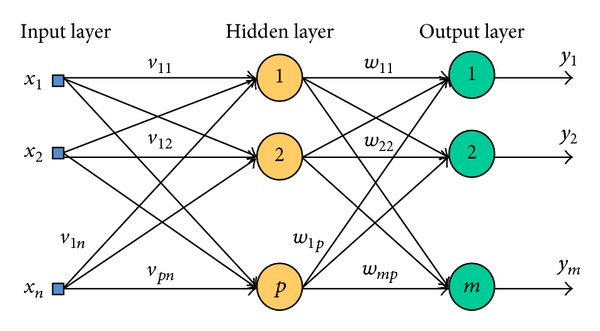

<br> <br>

- Input to neural network:
    1. Team’s character selections (integer value representing each character)
    2. The result of the game, 1 if blue team won, 0 if red team won
 
    
 
    
- Our first idea of what a training example should look like: <br>
    - ((5, 131, 98, 41, 16), (112, 129, 46, 51, 9)) <br>
    - (1, 0)
    - This would show that the blue team had the champions with the integer vales of 5,131,98,41,16, while the red team had champions with the interger values 112,129,46,51,9, with the blue team winning. 
    
  <br>
  
- Neural Network would output 0 or 1 to signal a predicted win or loss after learning. 

</div>




<br> <br>

<h2 align="center">Experimental Setup</h2> <br>

- We got our data by interacting with the Riot Games API through a Python script.


- With this script, we had to make many requests to the API, save the output of the request to a JSON file, and parse the JSON file to get the information we need to input as a parameter of the next request. 


- Ultimately, the data we wanted was the champion composition of each team, and whether they won or not. 

<br>

_Python script we wrote to interact and gather the data we needed from the Riot Games API_ <br>
https://developer.riotgames.com/apis

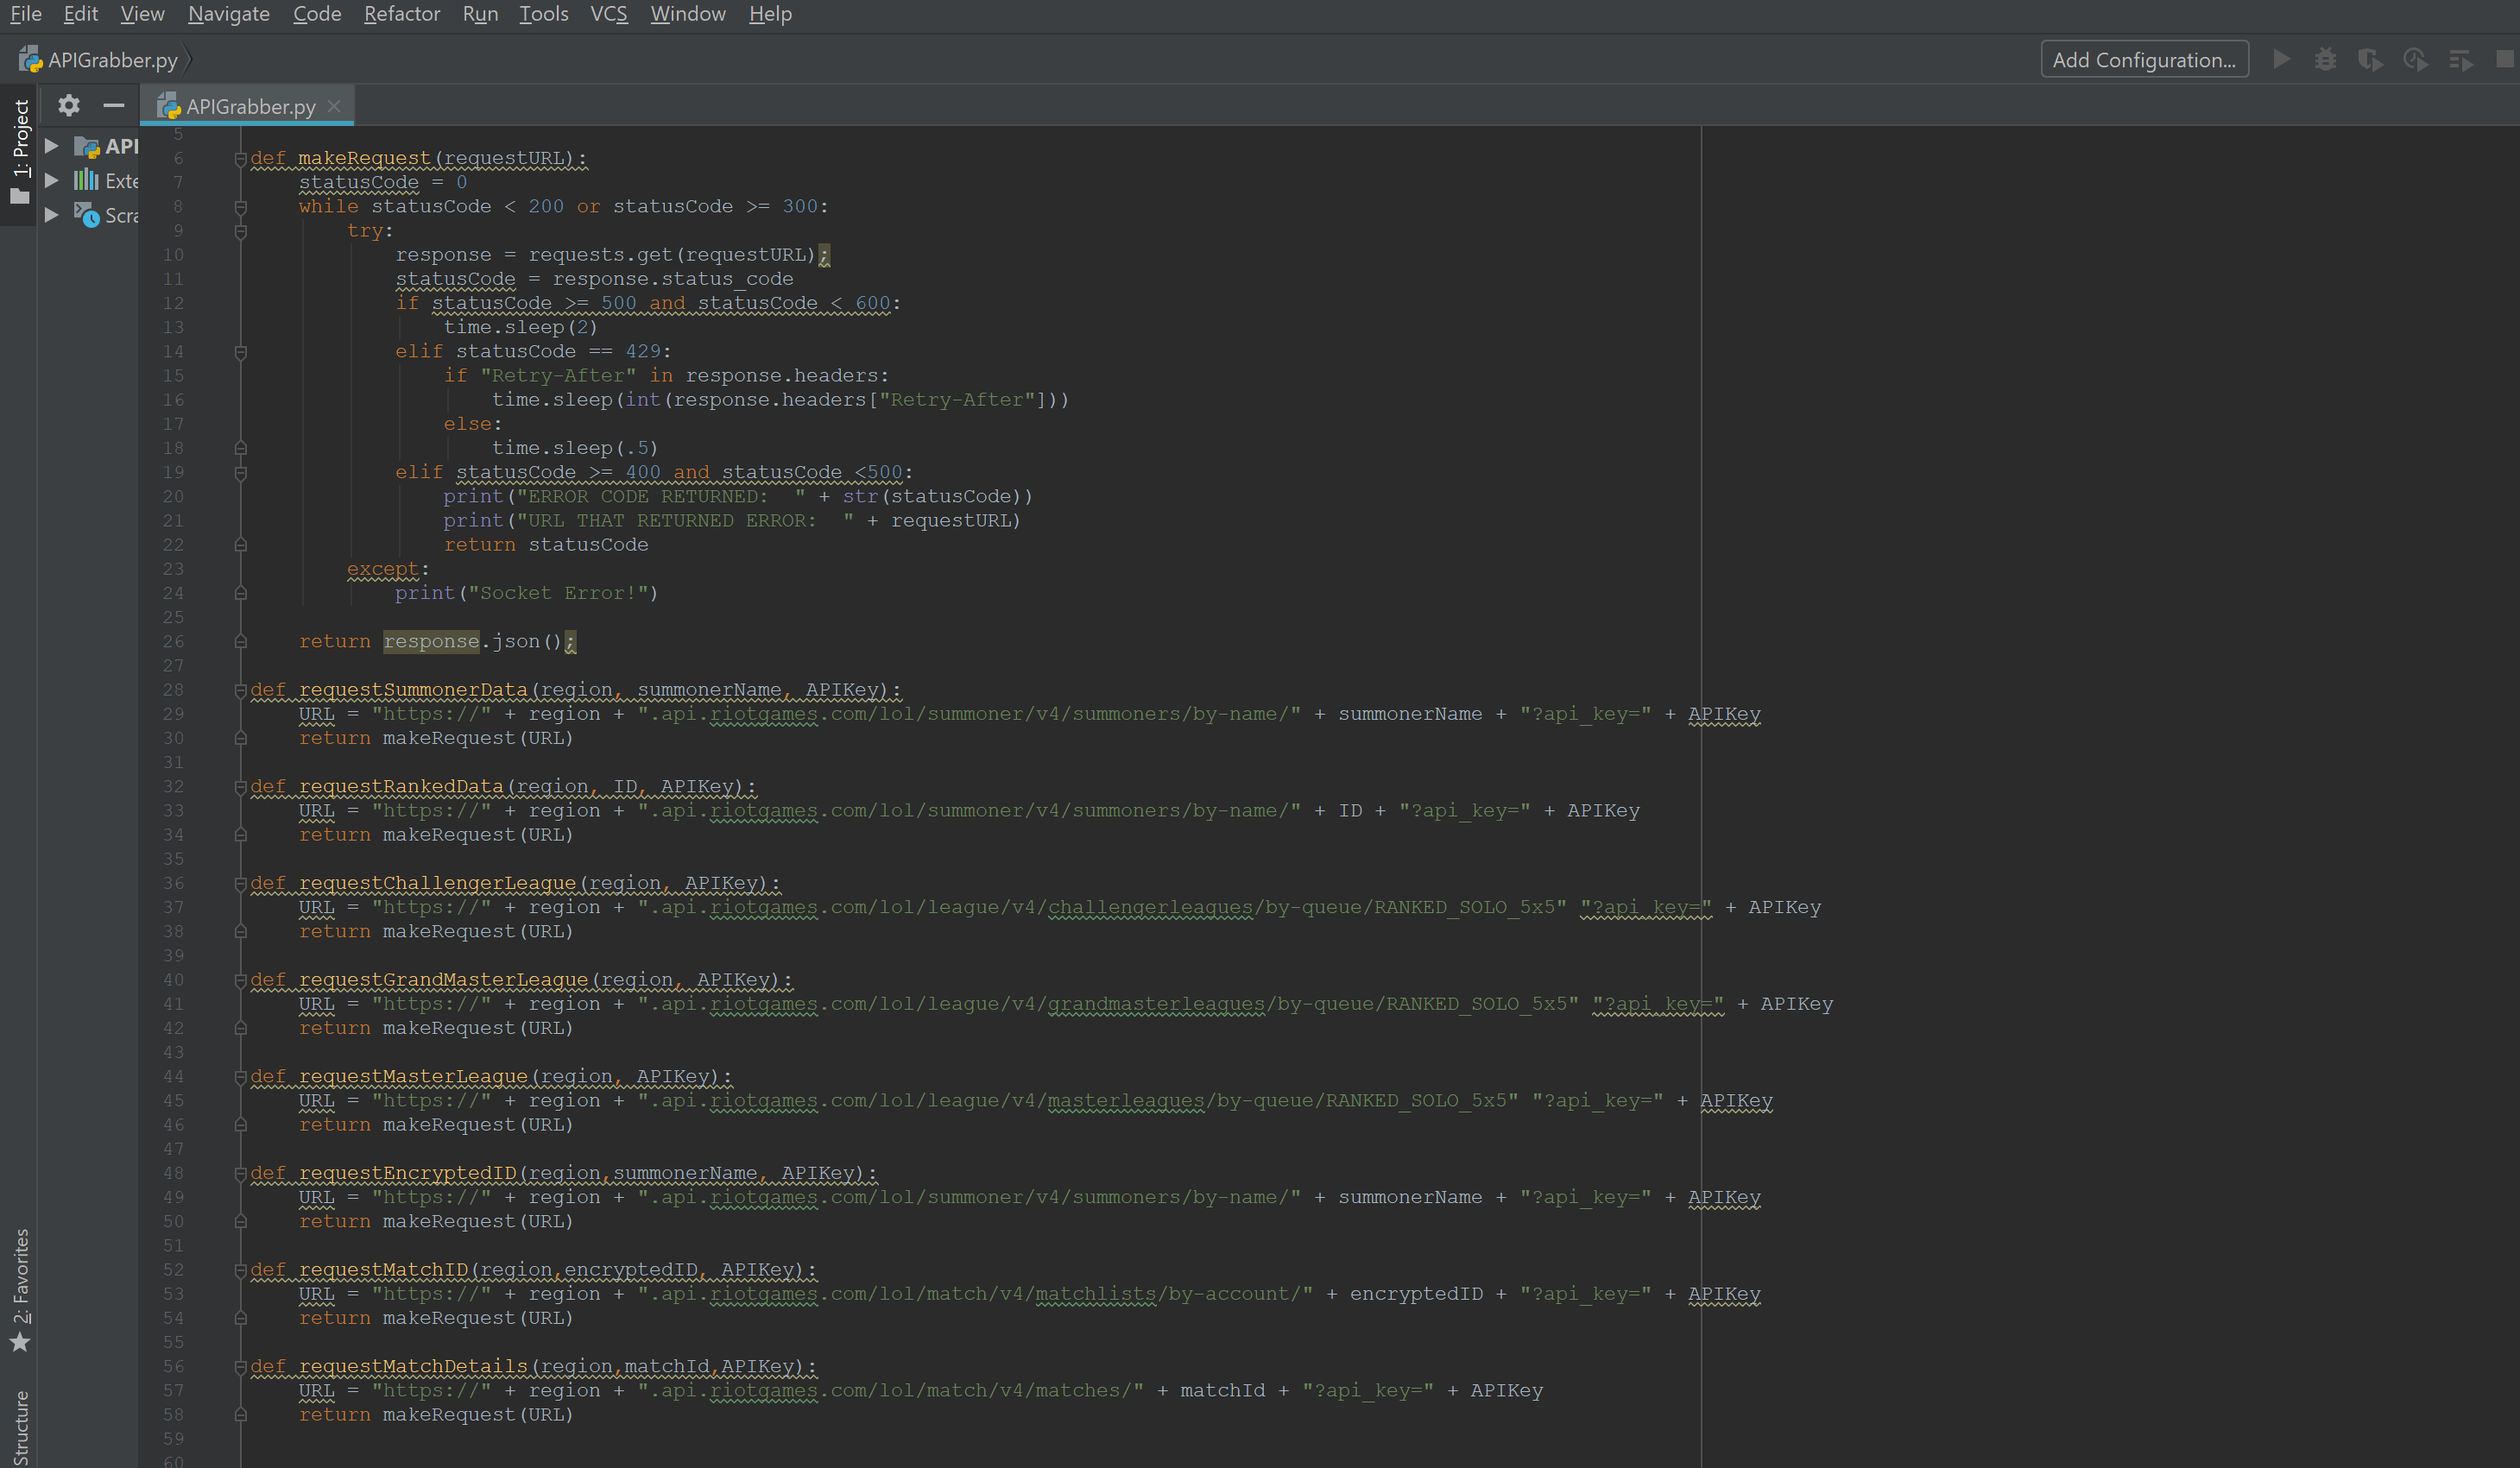
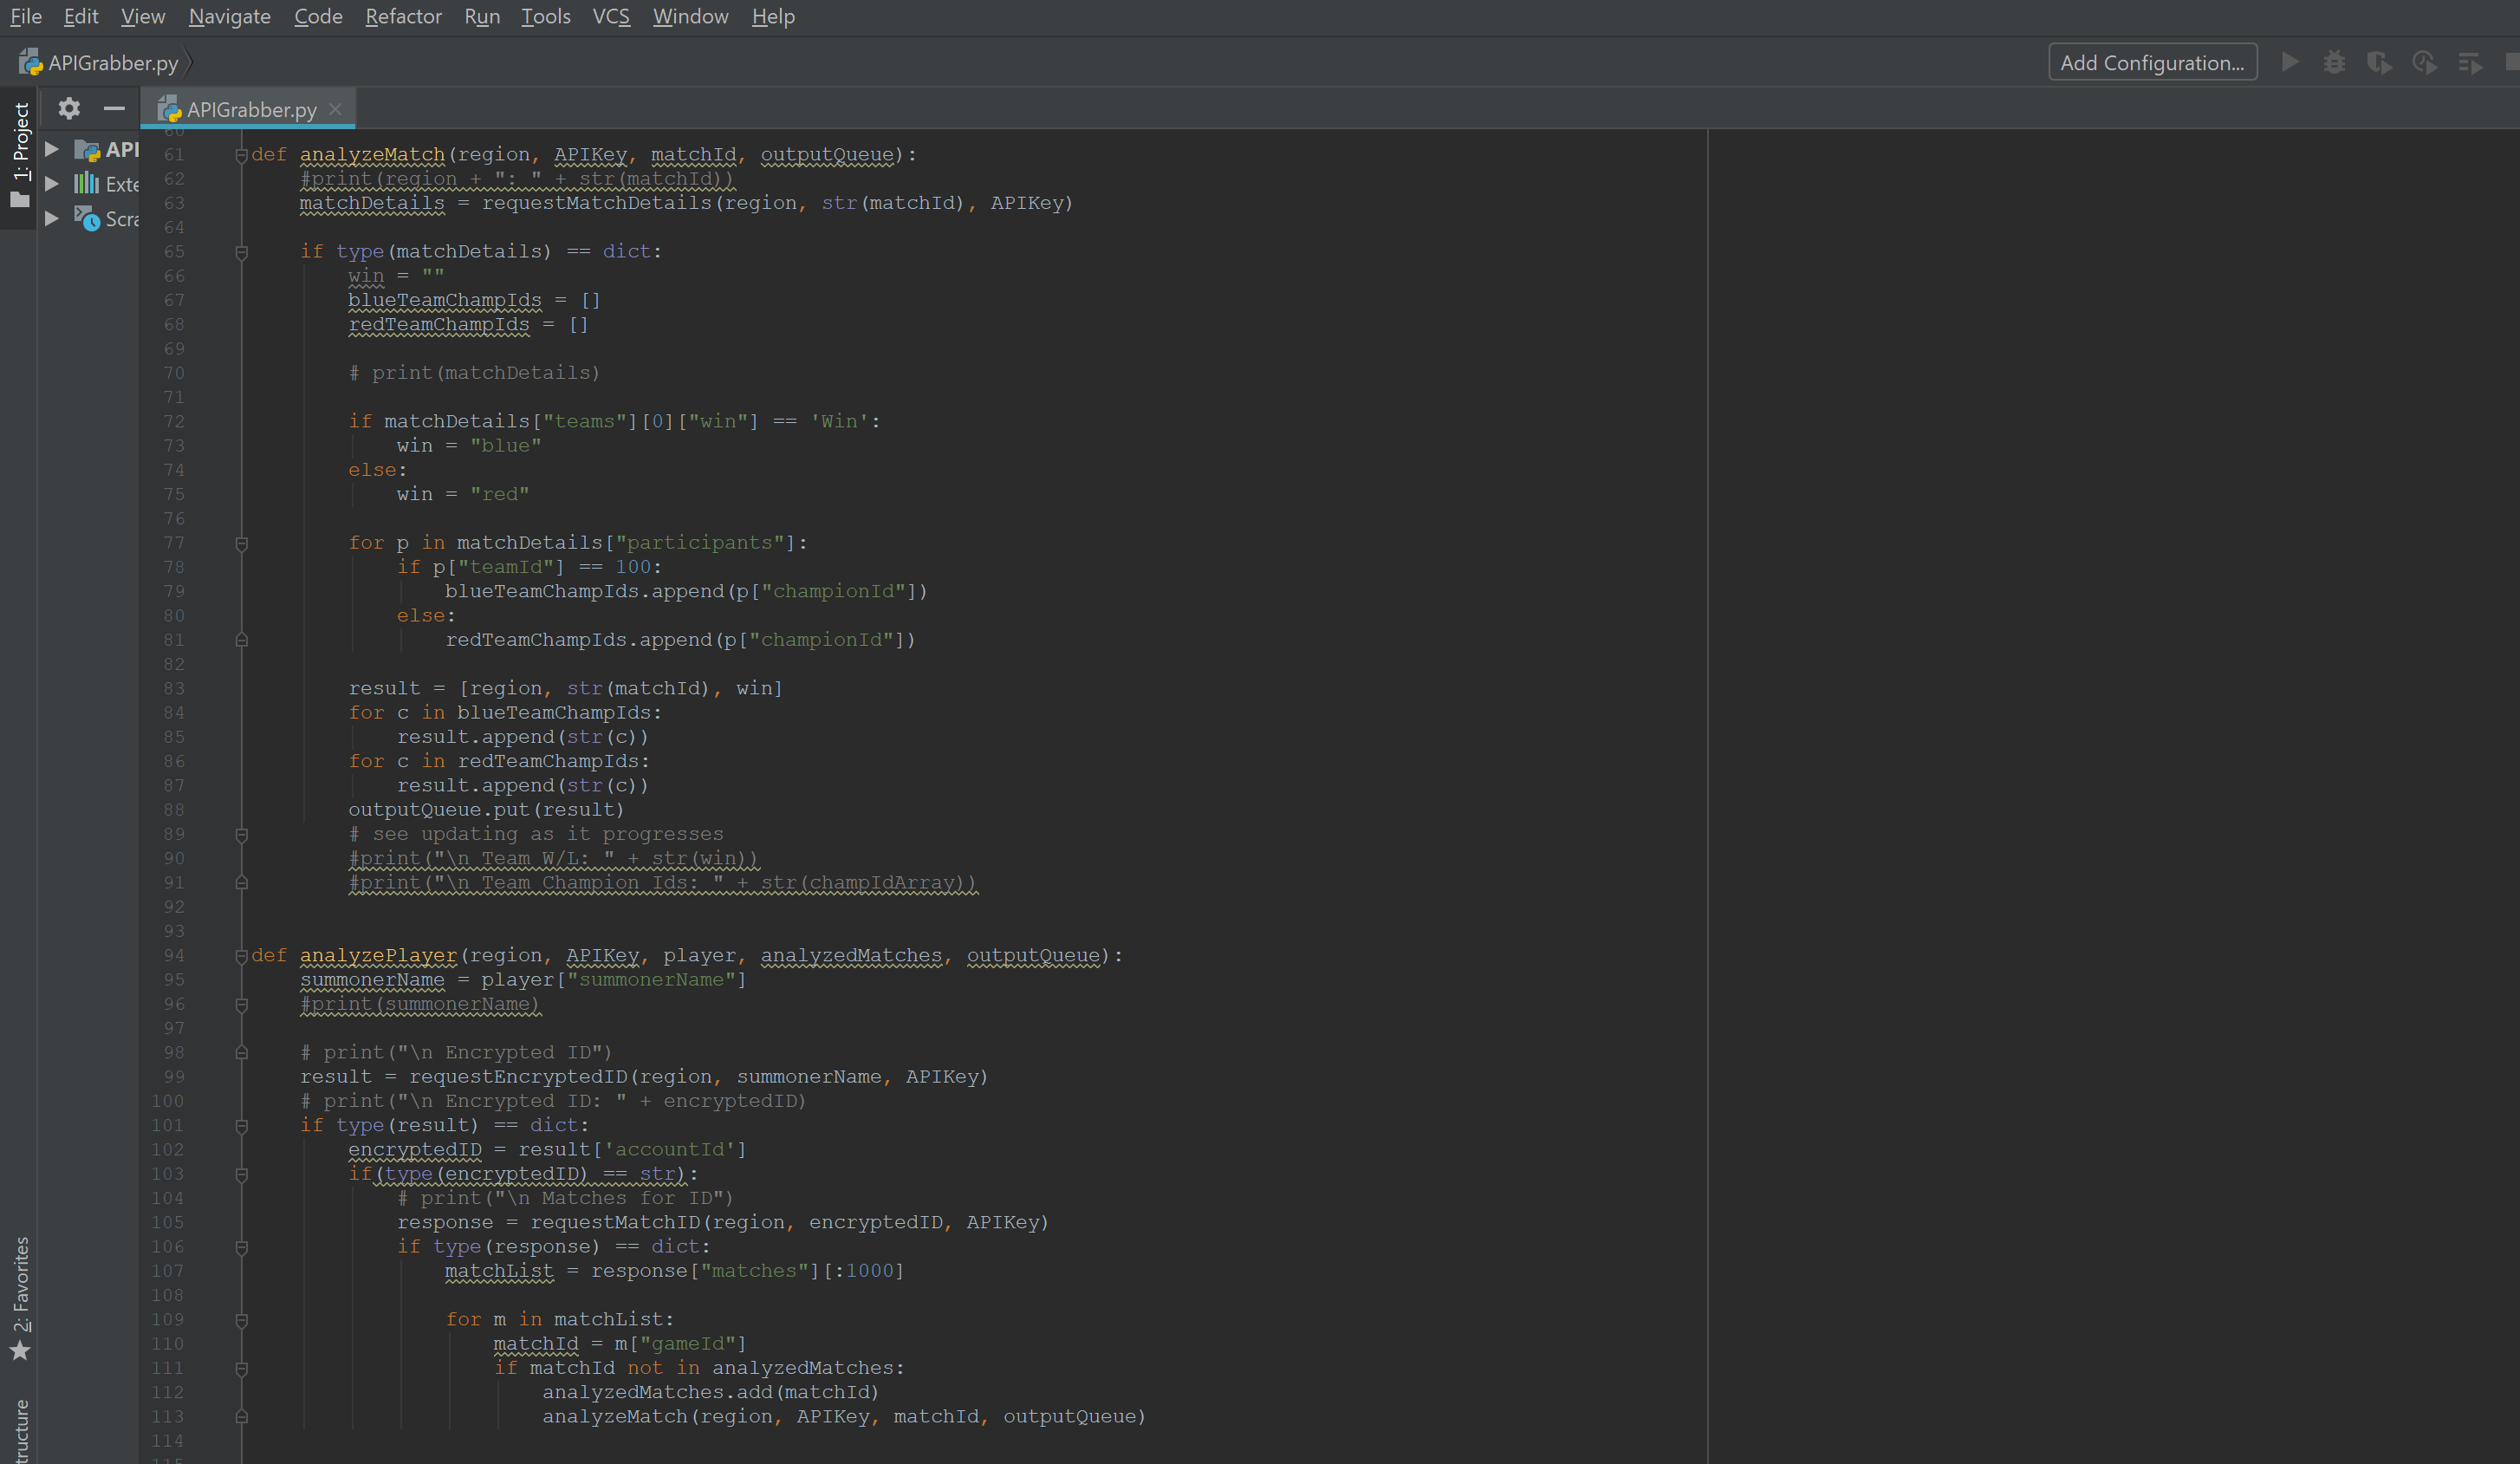
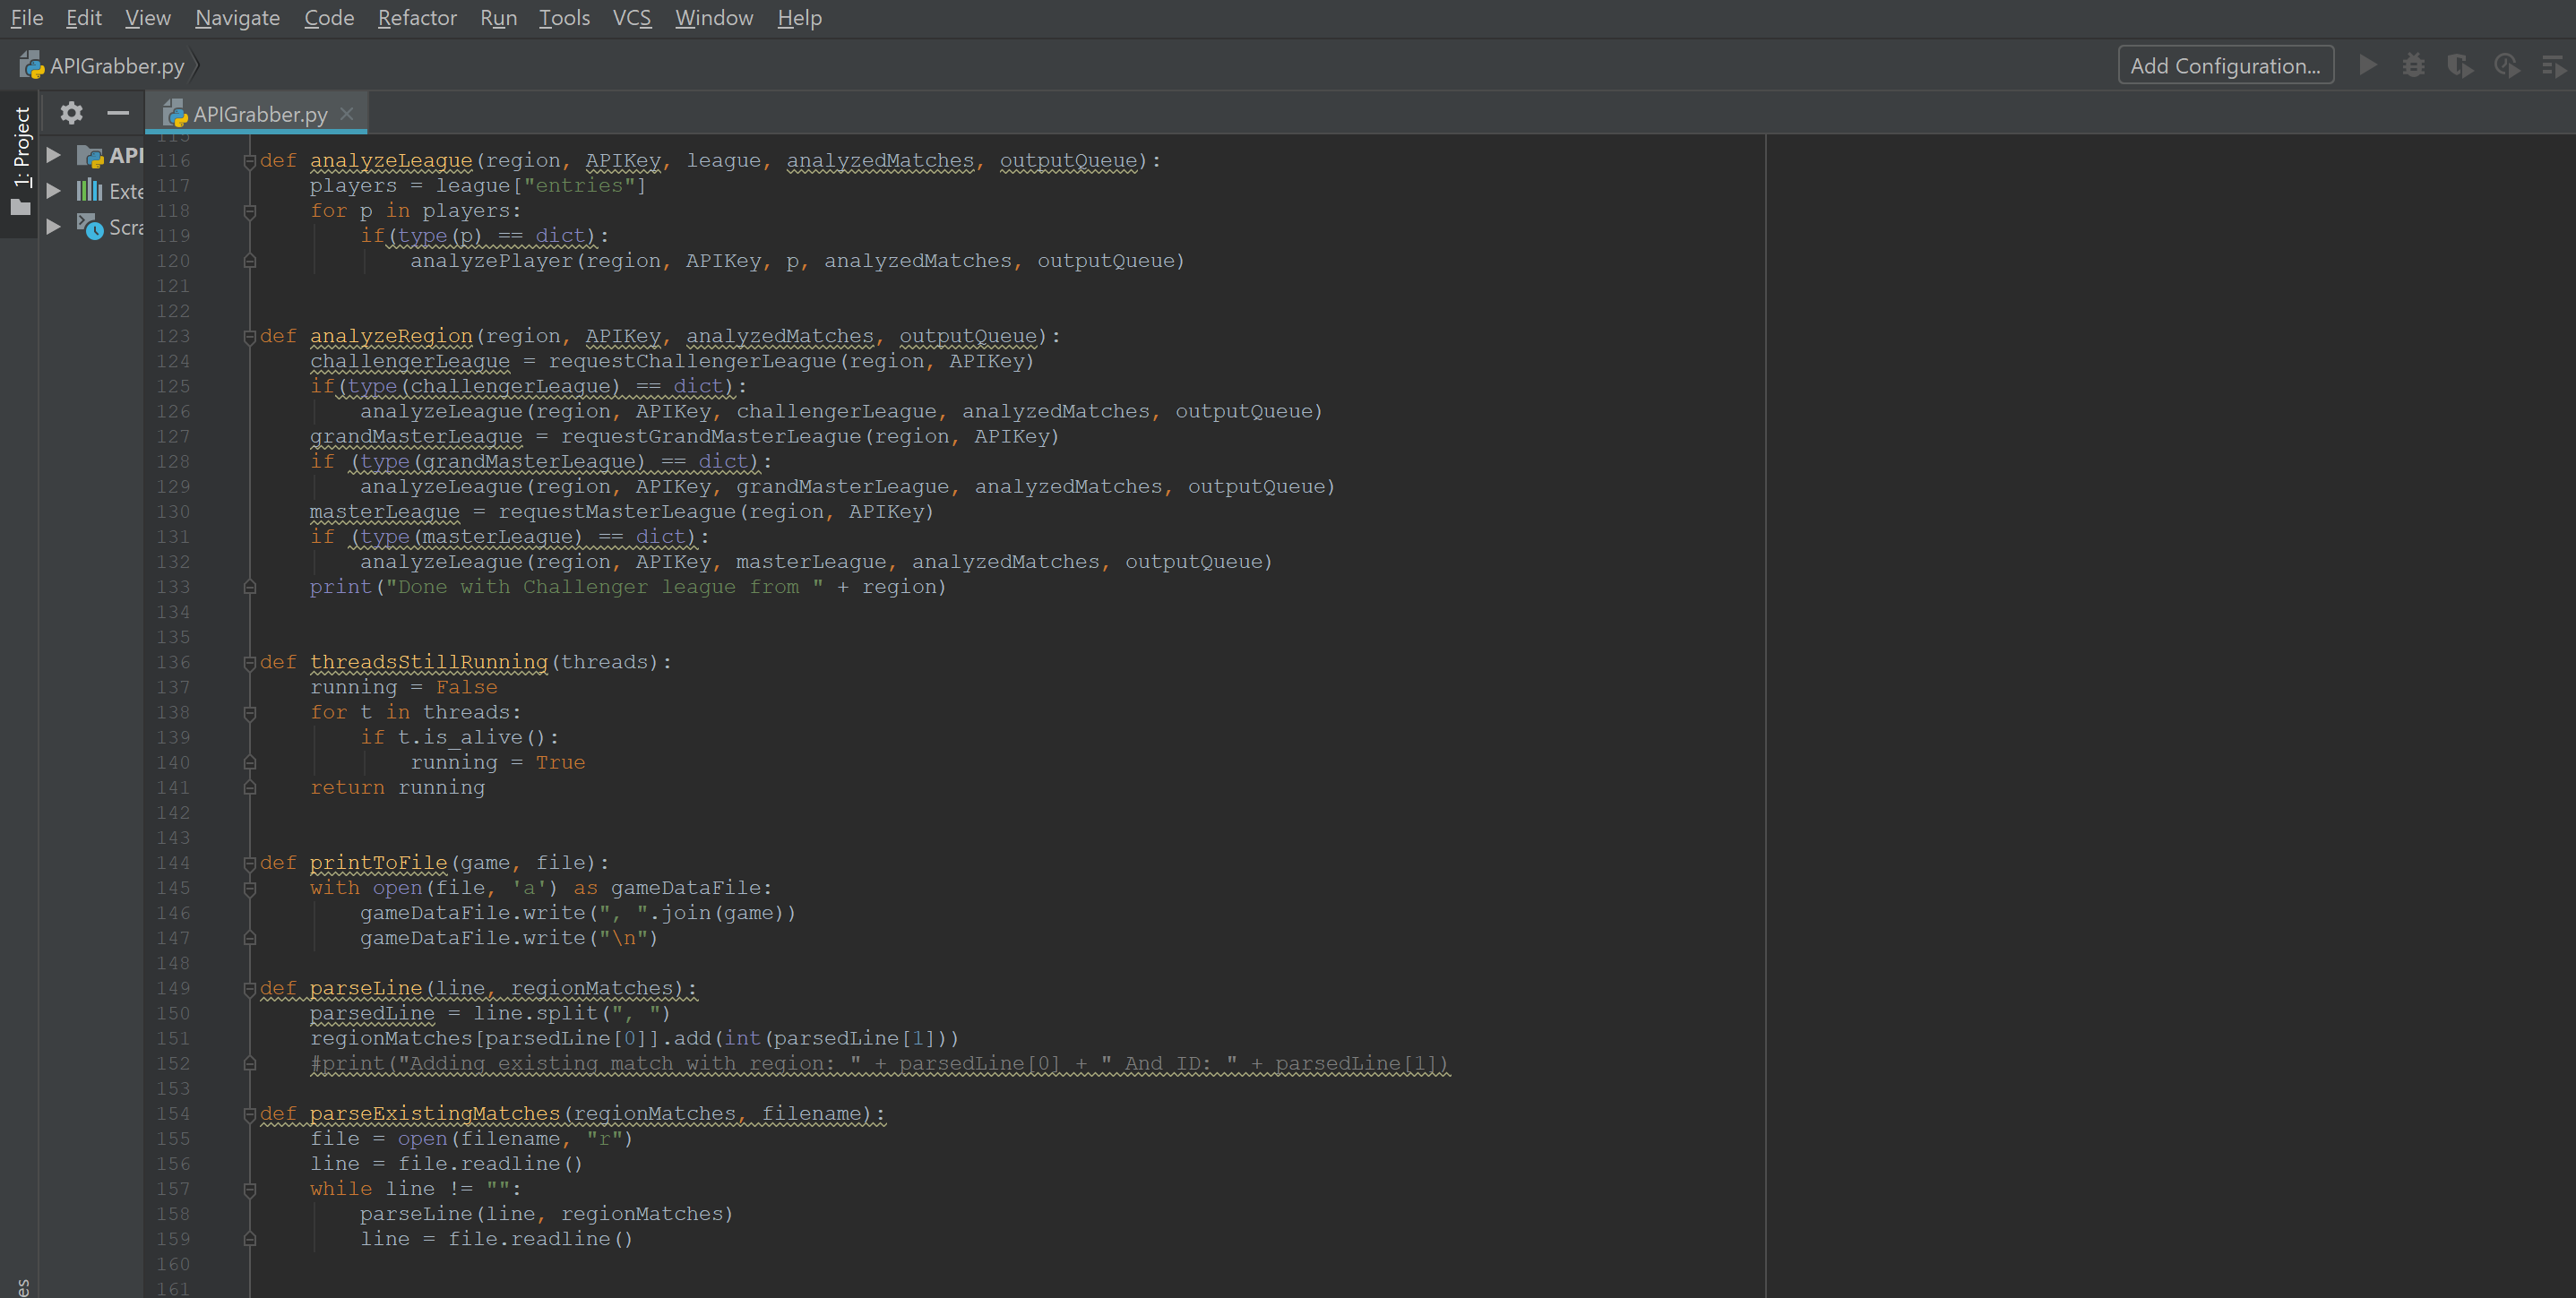
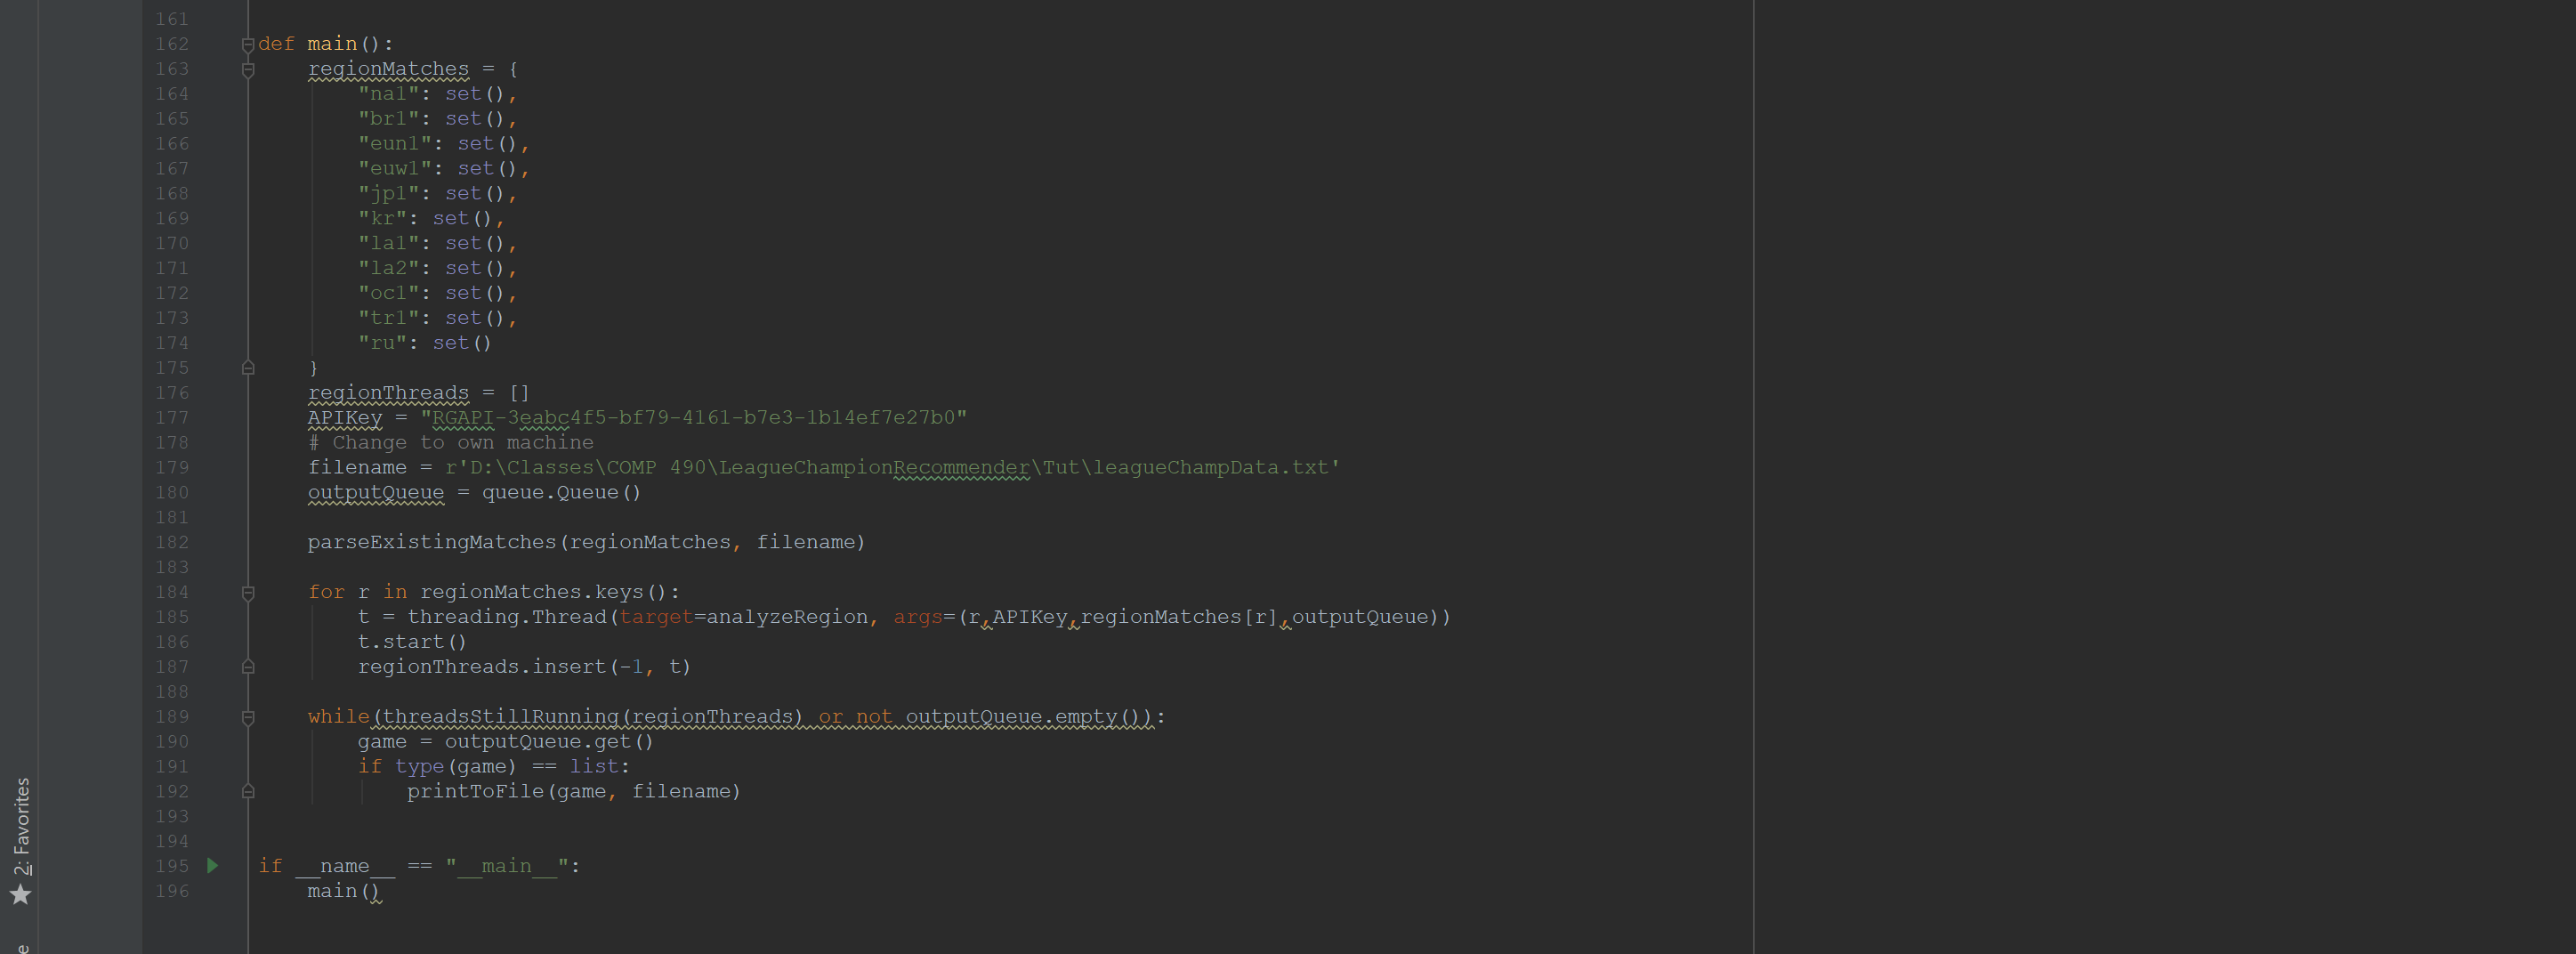



Evaluation Procedure?

In [12]:
# import numpy as np
from sklearn.utils import shuffle
#from sklearn.preprocessing import MinMaxScaler
import pandas as pd

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
data = pd.read_csv(r'D:\Classes\COMP 490\LeagueChampionRecommender\Tut\ParsedGameData.txt')  #Read data in
samples = data.iloc[:,:data.shape[1]-2] #Split data into samples...
labels = data.iloc[:,data.shape[1]-1:] #And labels
samples = samples.to_numpy()
labels = labels.to_numpy()
samples, labels = shuffle(samples, labels)  #Shuffle samples and labels while keeping them in the same locations relative to eachother

In [ ]:
#scaler = MinMaxScaler(feature_range=(0,1))
#scaled_samples = scaler.fit_transform(samples)
#scaled_labels = scaler.fit_transform(labels)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [ ]:
#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#print("Num GPUs Available: ", len(physical_devices))
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

<br> <br>

<h2 align="center">Results</h2> 



In [ ]:
model = Sequential([
    Dense(units=8, input_shape=(len(samples[0]),), activation='relu'),
    Dense(units=2, activation='softmax')  #This creates a neural network with an input layer defined by the
    #shape of the input data and an output layer with two possible outcomes, the value of each being a probability and the
    #sum of both being equal to 1
])
#model.summary()  #Prints a textual representation of the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy']) #Prepare model using given settings
model.fit(x=samples, y=labels, validation_split=0.1, epochs=100, shuffle=True, verbose=2) #Train model

In [ ]:
model.save('models/OracleLensTestModel.h5')

<br> 
Unfortunately, the accuracy of the system is very low. We tried many different things to improve it but with no success. With that being said, we decided to analyze how different sizes for our hidden layers performed to give a better idea of how that can affect your accuracy on similar data sets. That data is in the graph below. 

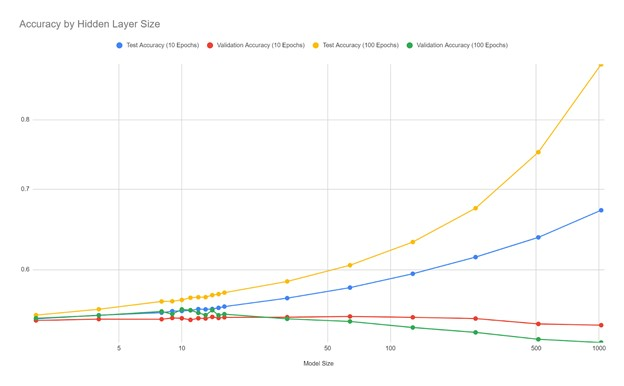

<br> <br>

<h2 align="center">Conclusion</h2> <br>

- It is very difficult to predict the outcome of a League of Legends match only given the champion selection of each team.
    - Although our model does do better than randomly guessing, the skill of the players placed on each team is the most important predictor of a win, and that isn't a feature that our model aimed to include. 
    

- Despite being unable to thus far create a very accurate model, we’ve discovered some interesting things about the effect of the size of the hidden layer on accuracy.


- Specifically for this scenario, the optimal hidden layer size appears to be around 10 nodes.


